In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [2]:
# loading the dataset
df = pd.read_csv('SampleData-Mobitel.csv')
df

,id,package,product_desc,deducted_amt,event_time_stamp,connection_age,gender,age,dateval
0,52671547813691168,WAKEUP,Wake_up_call,1.23,2020-05-12 10:14:57,3768,0,37,2020-05-12
1,55993477747811320,CRBT_CNT,crbt_cnt_ren_Daily,3.68,2020-05-12 04:52:43,2755,0,36,2020-05-12
2,55993477747811320,CRBT_SRV,crbt_srv_ren_Daily,2.45,2020-05-12 03:42:44,2755,0,36,2020-05-12
3,52671565671173152,CRBT_SRV,crbt_srv_ren_Daily,2.45,2020-05-12 03:44:09,3764,1,57,2020-05-12
4,55993499054455256,B2W,Bid2Win,6.13,2020-05-12 10:36:05,2710,1,53,2020-05-12
...,...,...,...,...,...,...,...,...,...
9995,55998334480175024,CRBT_CNT,crbt_cnt_ren_Daily,3.68,2020-05-12 05:18:01,1462,1,58,2020-05-12
9996,52676412906692448,B2W,Bid2Win,6.13,2020-05-12 05:03:07,3702,1,47,2020-05-12
9997,52676412906692448,CRBT_CNT,crbt_cnt_ren_Daily,3.68,2020-05-12 05:18:02,3702,1,47,2020-05-12
9998,52676412906692448,CRBT_SRV,crbt_srv_ren_Daily,2.45,2020-05-12 04:23:32,3702,1,47,2020-05-12


In [3]:

# from google.colab import drive
# drive.mount('/content/drive/')

In [4]:
df.describe()

,id,deducted_amt,connection_age,gender,age
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.519451e+16,5.834779,1861.330500,0.666000,40.337000
std,1.444181e+15,29.018861,1354.645871,0.471663,86.089826
min,4.934094e+16,1.230000,0.000000,0.000000,-5969.000000
25%,5.596131e+16,2.450000,696.000000,0.000000,31.000000
50%,5.598322e+16,3.680000,1577.000000,1.000000,40.000000
75%,5.599214e+16,5.510000,2847.000000,1.000000,51.000000
max,5.599881e+16,2625.000000,5743.000000,1.000000,120.000000


In [5]:
df[df['age']< 0]

,id,package,product_desc,deducted_amt,event_time_stamp,connection_age,gender,age,dateval
2240,55964793478969584,CLT,Celltick,2.45,2020-05-12 13:01:35,334,1,-5969,2020-05-12
2241,55964793478969584,MZIP,mSpace_Inzpire,2.05,2020-05-12 15:06:26,334,1,-5969,2020-05-12


In [6]:
df[df['age']>84]

,id,package,product_desc,deducted_amt,event_time_stamp,connection_age,gender,age,dateval
479,55994668930103080,STAR,Star_Frieds,1.23,2020-05-12 01:28:39,2604,0,85,2020-05-12
480,55994668930103080,WAKEUP,Wake_up_call,1.23,2020-05-12 12:23:30,2604,0,85,2020-05-12
481,55994668930103080,MZIP,mSpace_Inzpire,4.90,2020-05-12 01:08:44,2604,0,85,2020-05-12
482,55994668930103080,STAR,Star_Frieds,1.84,2020-05-12 01:13:47,2604,0,85,2020-05-12
483,55994668930103080,STAR,Star_Frieds,1.23,2020-05-12 01:25:36,2604,0,85,2020-05-12
484,55994668930103080,STAR,Star_Frieds,1.84,2020-05-12 01:18:20,2604,0,85,2020-05-12
726,55996677053773488,MZIP,mSpace_Inzpire,6.13,2020-05-12 07:10:33,142,1,86,2020-05-12
830,55997008515930616,CRBT_SRV,crbt_srv_ren_Daily,2.45,2020-05-12 19:38:43,938,1,86,2020-05-12
856,55997099346203048,CRBT_SRV,crbt_srv_ren_Daily,2.45,2020-05-12 04:20:02,817,1,120,2020-05-12
857,55997099346203048,CRBT_CNT,crbt_cnt_ren_Daily,3.68,2020-05-12 05:09:31,817,1,120,2020-05-12


In [7]:
df.drop(df[df['age'] < 0].index, inplace = True)

In [8]:
df.drop(df[df['age'] >84].index, inplace = True)


In [9]:
# filetring out the relevant columns
df_filtered = df[['id', 'age', 'gender', 'connection_age']]
df_filtered

,id,age,gender,connection_age
0,52671547813691168,37,0,3768
1,55993477747811320,36,0,2755
2,55993477747811320,36,0,2755
3,52671565671173152,57,1,3764
4,55993499054455256,53,1,2710
...,...,...,...,...
9995,55998334480175024,58,1,1462
9996,52676412906692448,47,1,3702
9997,52676412906692448,47,1,3702
9998,52676412906692448,47,1,3702


In [10]:
# removing duplicates
df_filtered = df_filtered.drop_duplicates()
df_filtered

,id,age,gender,connection_age
0,52671547813691168,37,0,3768
1,55993477747811320,36,0,2755
3,52671565671173152,57,1,3764
4,55993499054455256,53,1,2710
7,55993504611340432,44,0,2751
...,...,...,...,...
9990,55998329827709328,54,1,2272
9991,55998330038244280,38,0,1783
9993,55998331894431832,33,0,1432
9994,55998334480175024,58,1,1462


In [11]:
# df_filtered[df_filtered['id']== 52660620184455024]

In [12]:
df_filtered.describe()

,id,age,gender,connection_age
count,5.190000e+03,5190.000000,5190.000000,5190.000000
mean,5.523361e+16,41.500385,0.654721,1826.643160
std,1.417218e+15,13.658553,0.475505,1355.188827
min,4.934094e+16,16.000000,0.000000,0.000000
25%,5.596194e+16,30.000000,0.000000,664.000000
50%,5.598347e+16,40.000000,1.000000,1522.000000
75%,5.599231e+16,51.000000,1.000000,2780.000000
max,5.599881e+16,84.000000,1.000000,5743.000000


In [13]:
# df_filtered[df_filtered['age']< 0]

In [14]:
# df_filtered[df_filtered['age']>80]

In [15]:
# df_filtered.drop(df_filtered[df_filtered['age'] < 0].index, inplace = True)

In [16]:
# df_filtered.drop(df_filtered[df_filtered['age'] >80].index, inplace = True)

In [17]:
# df_filtered[df_filtered['age']> 80]

In [18]:
dfCluster = df_filtered[['age', 'connection_age', 'gender']]

In [19]:
s = StandardScaler()

In [20]:
dfCluster = s.fit_transform(dfCluster)

In [21]:
dfCluster

array([[-0.32952384,  1.43267407, -1.37702773],
       [-0.40274509,  0.68510474, -1.37702773],
       [ 1.13490116,  1.42972217,  0.72620179],
       ...,
       [-0.62240884, -0.29123704, -1.37702773],
       [ 1.20812241, -0.26909777,  0.72620179],
       [ 0.40268866,  1.38396768,  0.72620179]])

In [22]:
dfCluster = pd.DataFrame(dfCluster, columns = ['age', 'connection_age','gender'])
dfCluster

,age,connection_age,gender
0,-0.329524,1.432674,-1.377028
1,-0.402745,0.685105,-1.377028
2,1.134901,1.429722,0.726202
3,0.842016,0.651896,0.726202
4,0.183025,0.682153,-1.377028
...,...,...,...
5185,0.915237,0.328663,0.726202
5186,-0.256303,-0.032208,-1.377028
5187,-0.622409,-0.291237,-1.377028
5188,1.208122,-0.269098,0.726202


In [23]:
# finding the optimal number of clusters using elbow method
distortions = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(dfCluster)
    distortions.append(kmeanModel.inertia_)

In [24]:
clusterCenters = pd.DataFrame({'Clusters':K, 'Distortions': distortions})
clusterCenters 

,Clusters,Distortions
0,1,15570.000000
1,2,10263.989195
2,3,7277.447013
3,4,5704.241325
4,5,4428.132832
5,6,3663.424454
6,7,3030.301581
7,8,2679.908814
8,9,2403.036467


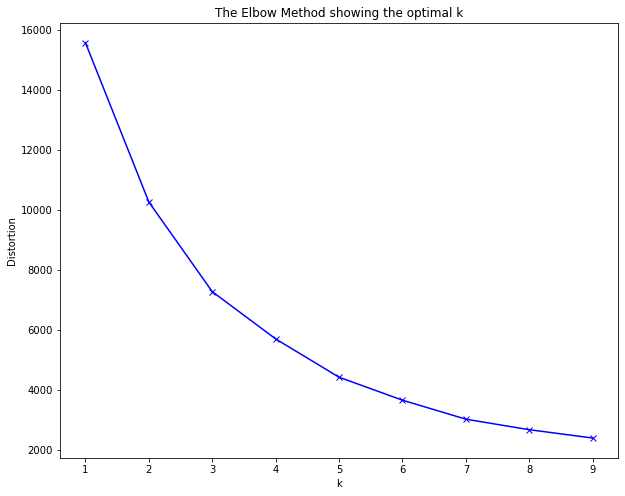

In [25]:
plt.figure(figsize=(10,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [26]:
# finding the optimal number of clusters using silhoutte method
import sklearn.metrics as metrics
from sklearn.metrics import silhouette_score

In [27]:
# dfArray = dfCluster.iloc[:,:].values

In [28]:
for i in range(2, 12):
    labels = KMeans(n_clusters = i, init = 'k-means++', max_iter = 100, random_state=50).fit(dfCluster).labels_
    print('silhoutte score for clusters='+str(i)+' is '
         + str(metrics.silhouette_score(dfCluster, labels, metric = 'euclidean', sample_size=1000, random_state=200)))

silhoutte score for clusters=2 is 0.38687727172114184
silhoutte score for clusters=3 is 0.38770721747259135
silhoutte score for clusters=4 is 0.3892950239090153
silhoutte score for clusters=5 is 0.38907487794518664
silhoutte score for clusters=6 is 0.4032619752226424
silhoutte score for clusters=7 is 0.395631443796117
silhoutte score for clusters=8 is 0.3830414263734159
silhoutte score for clusters=9 is 0.37257358962626574
silhoutte score for clusters=10 is 0.365739193083852
silhoutte score for clusters=11 is 0.36930151326706984


In [29]:
# silhouette_score(dfCluster, labels)

In [30]:
model = KMeans(n_clusters=6, init='k-means++', max_iter=100, random_state = 50)
kmeans = model.fit(dfCluster[['age', 'connection_age', 'gender']])

In [31]:
# print(x[kmeans == 0,0][1])
# print(x[y_clusters == 0,1][1])
# print(x[y_clusters == 0,2][1])

In [32]:
kmeans.cluster_centers_

array([[ 0.07616538,  1.40613398,  0.72620179],
       [-0.79856077, -0.54861838,  0.72620179],
       [ 0.33529522,  1.06055964, -1.37702773],
       [-0.74174997, -0.68396564, -1.37702773],
       [ 1.02493165, -0.62970846, -1.37702773],
       [ 1.0978801 , -0.28865247,  0.72620179]])

In [33]:
dfCluster['Clusters'] = np.asarray(kmeans.labels_, dtype = int)

In [34]:
dfCluster.head(10)

,age,connection_age,gender,Clusters
0,-0.329524,1.432674,-1.377028,2
1,-0.402745,0.685105,-1.377028,2
2,1.134901,1.429722,0.726202,0
3,0.842016,0.651896,0.726202,5
4,0.183025,0.682153,-1.377028,2
5,-0.768851,-1.239536,-1.377028,3
6,-1.208179,-0.565026,-1.377028,3
7,0.475910,-0.813724,-1.377028,4
8,0.036582,1.324930,0.726202,0
9,-0.109860,0.671821,-1.377028,2


In [35]:
dfCluster['Clusters'].value_counts()

1    1495
0    1011
5     892
3     771
4     532
2     489
Name: Clusters, dtype: int64

In [36]:
df_filtered['Clusters'] = np.asarray(kmeans.labels_, dtype = int)

<ipython-input-36-aa739f4db1fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Clusters'] = np.asarray(kmeans.labels_, dtype = int)


In [37]:
df_filtered.head()

,id,age,gender,connection_age,Clusters
0,52671547813691168,37,0,3768,2
1,55993477747811320,36,0,2755,2
3,52671565671173152,57,1,3764,0
4,55993499054455256,53,1,2710,5
7,55993504611340432,44,0,2751,2


<AxesSubplot:xlabel='age', ylabel='connection_age'>

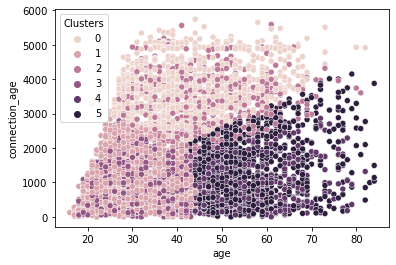

In [38]:
sns.scatterplot(x='age', y='connection_age', hue='Clusters', data=df_filtered )

In [39]:
from mpl_toolkits.mplot3d import Axes3D

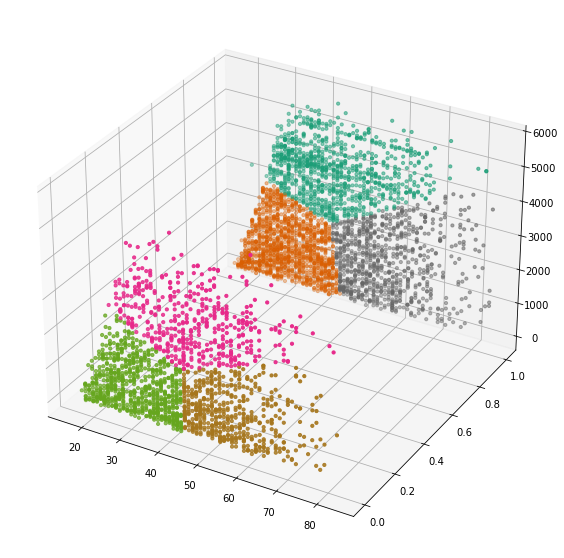

In [40]:
fig = plt.figure(figsize = (12, 10))
ax = fig.add_subplot(111, projection='3d')
x = np.array(df_filtered['age'])
y = np.array(df_filtered['gender'])
z = np.array(df_filtered['connection_age'])

ax.scatter(x,y,z, c=df_filtered["Clusters"], s=10, cmap="Dark2")

plt.show()

In [41]:
# c1 = df_filtered[df_filtered['Clusters'] == 1]

In [42]:
#--------------------
# sns.scatterplot(x='age', y='connection_age', hue = 'gender', data=c1 )

In [43]:
df['Clusters'] = df['id'].map(df_filtered.set_index('id')['Clusters'])

In [44]:
df

,id,package,product_desc,deducted_amt,event_time_stamp,connection_age,gender,age,dateval,Clusters
0,52671547813691168,WAKEUP,Wake_up_call,1.23,2020-05-12 10:14:57,3768,0,37,2020-05-12,2
1,55993477747811320,CRBT_CNT,crbt_cnt_ren_Daily,3.68,2020-05-12 04:52:43,2755,0,36,2020-05-12,2
2,55993477747811320,CRBT_SRV,crbt_srv_ren_Daily,2.45,2020-05-12 03:42:44,2755,0,36,2020-05-12,2
3,52671565671173152,CRBT_SRV,crbt_srv_ren_Daily,2.45,2020-05-12 03:44:09,3764,1,57,2020-05-12,0
4,55993499054455256,B2W,Bid2Win,6.13,2020-05-12 10:36:05,2710,1,53,2020-05-12,5
...,...,...,...,...,...,...,...,...,...,...
9995,55998334480175024,CRBT_CNT,crbt_cnt_ren_Daily,3.68,2020-05-12 05:18:01,1462,1,58,2020-05-12,5
9996,52676412906692448,B2W,Bid2Win,6.13,2020-05-12 05:03:07,3702,1,47,2020-05-12,0
9997,52676412906692448,CRBT_CNT,crbt_cnt_ren_Daily,3.68,2020-05-12 05:18:02,3702,1,47,2020-05-12,0
9998,52676412906692448,CRBT_SRV,crbt_srv_ren_Daily,2.45,2020-05-12 04:23:32,3702,1,47,2020-05-12,0


In [45]:
c1 = df[df['Clusters'] == 2]
c1

,id,package,product_desc,deducted_amt,event_time_stamp,connection_age,gender,age,dateval,Clusters
0,52671547813691168,WAKEUP,Wake_up_call,1.23,2020-05-12 10:14:57,3768,0,37,2020-05-12,2
1,55993477747811320,CRBT_CNT,crbt_cnt_ren_Daily,3.68,2020-05-12 04:52:43,2755,0,36,2020-05-12,2
2,55993477747811320,CRBT_SRV,crbt_srv_ren_Daily,2.45,2020-05-12 03:42:44,2755,0,36,2020-05-12,2
7,55993504611340432,MZIP,mSpace_Inzpire,6.13,2020-05-12 01:33:20,2751,0,44,2020-05-12,2
13,55993525404741408,B2W,Bid2Win,6.13,2020-05-12 06:21:50,2737,0,40,2020-05-12,2
...,...,...,...,...,...,...,...,...,...,...
9946,52676294157040136,VWL,Video World,5.51,2020-05-12 01:23:14,3160,0,29,2020-05-12,2
9947,52676294157040136,AWDS,Allterco_AWORLD_sub,11.02,2020-05-12 13:11:14,3160,0,29,2020-05-12,2
9948,52676294157040136,SMTV,Shemaroo_MobiplexTV,11.02,2020-05-12 08:27:17,3160,0,29,2020-05-12,2
9949,52676294157040136,HWPFS,Hungama_Fun_Store,5.51,2020-05-12 02:34:09,3160,0,29,2020-05-12,2


In [46]:
p = c1.pivot_table(values='deducted_amt', index='id', columns='package', aggfunc='mean').fillna(0)
p

package,AOZM,APIG,ASTV,AWDS,B2W,BCENG,BCVA,CLBS,CLT,CRBT_CNT,...,SMMD,SMTV,STAR,STFR,STKD,STKG,STTK,VAST,VWL,WAKEUP
id,,,,,,,,,,,,,,,,,,,,,
49340998912448152,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,2.45,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49341021206737304,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,3.68,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52656963014123744,0.0,3.68,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52657005607075112,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52657039708981304,0.0,0.00,0.00,0.0,6.13,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55998276041002920,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,3.68,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55998321378877176,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55998404435773320,0.0,0.00,2.45,0.0,0.00,0.0,0.0,0.0,0.00,3.68,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
def encode(x):
    if x<= 0:
        return 0
    else:
        return 1

In [48]:
p_sets = p.applymap(encode)
p_sets

package,AOZM,APIG,ASTV,AWDS,B2W,BCENG,BCVA,CLBS,CLT,CRBT_CNT,...,SMMD,SMTV,STAR,STFR,STKD,STKG,STTK,VAST,VWL,WAKEUP
id,,,,,,,,,,,,,,,,,,,,,
49340998912448152,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
49341021206737304,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
52656963014123744,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52657005607075112,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52657039708981304,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55998276041002920,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
55998321378877176,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55998404435773320,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [49]:
p_sets['output']=p_sets.apply(lambda x: ' '.join(x.index[x.eq(1)]),axis=1)

In [50]:
p_sets

package,AOZM,APIG,ASTV,AWDS,B2W,BCENG,BCVA,CLBS,CLT,CRBT_CNT,...,SMTV,STAR,STFR,STKD,STKG,STTK,VAST,VWL,WAKEUP,output
id,,,,,,,,,,,,,,,,,,,,,
49340998912448152,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,CLT
49341021206737304,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,CRBT_CNT CRBT_SRV
52656963014123744,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,APIG
52657005607075112,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,DAST
52657039708981304,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B2W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55998276041002920,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,CRBT_CNT CRBT_SRV
55998321378877176,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,KSPA
55998404435773320,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ASTV CRBT_CNT CRBT_SRV


In [51]:
p_sets['i'] = np.arange(len(p_sets))
p_sets

package,AOZM,APIG,ASTV,AWDS,B2W,BCENG,BCVA,CLBS,CLT,CRBT_CNT,...,STAR,STFR,STKD,STKG,STTK,VAST,VWL,WAKEUP,output,i
id,,,,,,,,,,,,,,,,,,,,,
49340998912448152,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,CLT,0
49341021206737304,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,CRBT_CNT CRBT_SRV,1
52656963014123744,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,APIG,2
52657005607075112,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,DAST,3
52657039708981304,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,B2W,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55998276041002920,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,CRBT_CNT CRBT_SRV,484
55998321378877176,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,KSPA,485
55998404435773320,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,ASTV CRBT_CNT CRBT_SRV,486


In [52]:
cv = CountVectorizer()
count_matrix = cv.fit_transform(p_sets["output"])
print("Count Matrix:", count_matrix.toarray())

Count Matrix: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]


In [53]:
cosine_sim = cosine_similarity(count_matrix)

In [54]:
#---------------------#

In [55]:
similar_movies = list(enumerate(cosine_sim[2]))

In [56]:
sorted_similar_movies = sorted(similar_movies, key=lambda x:x[1], reverse=True)

In [57]:
sorted_similar_movies

[(2, 1.0),
 (87, 1.0),
 (112, 1.0),
 (127, 1.0),
 (164, 1.0),
 (238, 1.0),
 (269, 1.0),
 (307, 1.0),
 (343, 1.0),
 (344, 1.0),
 (396, 1.0),
 (488, 1.0),
 (77, 0.7071067811865475),
 (141, 0.7071067811865475),
 (169, 0.7071067811865475),
 (170, 0.7071067811865475),
 (187, 0.7071067811865475),
 (232, 0.7071067811865475),
 (278, 0.7071067811865475),
 (279, 0.7071067811865475),
 (322, 0.7071067811865475),
 (404, 0.7071067811865475),
 (457, 0.7071067811865475),
 (68, 0.5773502691896258),
 (294, 0.5773502691896258),
 (367, 0.5773502691896258),
 (368, 0.5773502691896258),
 (452, 0.5773502691896258),
 (184, 0.5),
 (260, 0.5),
 (305, 0.5),
 (0, 0.0),
 (1, 0.0),
 (3, 0.0),
 (4, 0.0),
 (5, 0.0),
 (6, 0.0),
 (7, 0.0),
 (8, 0.0),
 (9, 0.0),
 (10, 0.0),
 (11, 0.0),
 (12, 0.0),
 (13, 0.0),
 (14, 0.0),
 (15, 0.0),
 (16, 0.0),
 (17, 0.0),
 (18, 0.0),
 (19, 0.0),
 (20, 0.0),
 (21, 0.0),
 (22, 0.0),
 (23, 0.0),
 (24, 0.0),
 (25, 0.0),
 (26, 0.0),
 (27, 0.0),
 (28, 0.0),
 (29, 0.0),
 (30, 0.0),
 (31, 0.0),

In [58]:
sorted_similar_all_movies = []*3
#len(p_sets) add in to the range of the for loop
for z in range(len(p_sets)):
  similar_movies_1 = list(enumerate(cosine_sim[z]))
  sorted_similar_movies_1 = sorted(similar_movies_1, key=lambda x:x[1], reverse=True)
  sorted_similar_all_movies.append(sorted_similar_movies_1)

#sorted_similar_all_movies

In [59]:
len(sorted_similar_all_movies)

489

In [60]:
def clearing_packages(tempList):
  tempList = list(dict.fromkeys(tempList))
  newPackages = []

  for y in tempList:
    newPackages.extend(y.split())

  newPackages = list(dict.fromkeys(newPackages))
  newPackages.remove("id")
  return newPackages

packages = []
rec_packages = []

for x in range(len(sorted_similar_all_movies)):
    
    k = p_sets[p_sets['i']==sorted_similar_all_movies[x][0][0]]
    selected_user_packages = []
    selected_user_packages.append(k.output.to_string(index=False))
    # print("selected user packages", selected_user_packages)
    return_list_user = clearing_packages(selected_user_packages)
    # print("return list user  :", return_list_user)
    
    for y in range(100):
      if(sorted_similar_all_movies[x][y][1] >= 0.2):
        j = p_sets[p_sets['i']==sorted_similar_all_movies[x][y][0]]
        # print(p_sets.index[sorted_similar_all_movies[x][y][0]])
        # print(j.i.to_string(index=False))
        # print(j.output.to_string(index=False))
        temp_packages = []
        temp_packages.append(j.output.to_string(index=False))
        returnList = clearing_packages(temp_packages)

        for z in returnList:
          rec_packages.append(z)

    res = list(set(return_list_user)^set(rec_packages))
    
    if(res==[]):
      packages.append("NaN")
    else:
      packages.append(res[0])
    rec_packages.clear()

In [61]:
id_numbers = []

for i in range(len(p_sets)):
  id_numbers.append(p_sets.index[i])

print(id_numbers)
print(packages)


res = dict(zip(id_numbers, packages))
# res = {}
# for key in id_numbers:
#     for value in packages:
#         res[key] = value
#         packages.remove(value)
#         break  
  
# Printing resultant dictionary 
print ("Resultant dictionary is : " +  str(res))

[49340998912448152, 49341021206737304, 52656963014123744, 52657005607075112, 52657039708981304, 52657119477364344, 52657134891802560, 52657553987914360, 52657555484548592, 52657568912272760, 52657604209152152, 52657612687498312, 52658230741827328, 52658241832972352, 52658330794579512, 52658459388230368, 52658581103036304, 52658828655047400, 52658856243457880, 52658967642729440, 52658979805155816, 52659026043119744, 52659032983430392, 52659066544461520, 52659070652558480, 52659179996597936, 52659188378477712, 52659304656722128, 52659310169726736, 52659329832420848, 52659389784646368, 52659401647701184, 52659417179714736, 52659450768369328, 52659499278889328, 52659524252483320, 52659533506422440, 52659780268452408, 52659790398751024, 52659825637259072, 52659882553598600, 52659935793884440, 52659979766989096, 52659983424432440, 52660013255649088, 52660021073144008, 52660032444472376, 52660105181364480, 52660119148891400, 52660139481718776, 52660163919179632, 52660199330845376, 52660303996

In [62]:
all_packages = ["AOZM",	"APIG",	"ASTV",	"AWDS",	"B2W",	"BCENG",	"BCVA",	"CBC",	"CLBS",	"CLT",	"CNDG",	"CRBT_CNT",	"CRBT_SRV",	"DAST",	"DUPAK",	"EVVI",	"FLS",	"FUCF",	"GAML",	"GFCS",	"GTNB",	"HOCO",	"HSUB",	"HWPFS",	"IMSTK",	"INDA",	"JSCC",	"KITM",	"KSPA",	"LEARN",	"LGZM",	"LOT",	"MHUNG",	"MIS",	"MNS",	"MPLEXTV",	"MQSM",	"MSC",	"MSZZ",	"MZIP",	"OTC"	,"OYIM",	"PASA",	"PLPL",	"PLZQ",	"PLZS",	"PREDG",	"SIQU",	"SRTU",	"STAR",	"STFR",	"STKD",	"STKG",	"STTK",	"STYO",	"SUWS",	"SWAP",	"VAST",	"VWL",	"WAKEUP",]

all_ids = []
for package in all_packages:
  all_ids.append([k for k,v in res.items() if v == package])

print(len(all_ids))
# print("The list is:" + str(str(all_ids)))

# for element in all_ids:
#     if type(element) is list:
        
#         result = str(element)[1:-1] 
#         print(element)
            
data = {'packages': all_packages,
        'IDs' : all_ids}
            
df = pd.DataFrame(data)

df

60


,packages,IDs
0,AOZM,[]
1,APIG,"[52657119477364344, 52658459388230368, 5265907..."
2,ASTV,[]
3,AWDS,[]
4,B2W,"[49340998912448152, 52656963014123744, 5265700..."
5,BCENG,"[52668325980789832, 55990331224707648]"
6,BCVA,[]
7,CBC,[]
8,CLBS,[52676084507647648]
9,CLT,"[55993781346853016, 55994737502513736]"


In [63]:
df.to_csv('cluster_2_packages.csv')